In [2]:
# Import required basic packages

import pandas as pd
import numpy as np
import time

# Import the required learning algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Import label encoder for handling categorical features
from sklearn.preprocessing import LabelEncoder

# Import scaling for KNN
from sklearn.preprocessing import StandardScaler

# Import the required utilities for analysis and plotting

from sklearn.model_selection import train_test_split, learning_curve, validation_curve,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Read and create a dataframe for Obesity dataset

obesity=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
# Define file path for the output text file
output_file = 'Obesity_dataset_analysis.txt'

In [5]:
# Check the datatypes and missing information and print it to file

with open(output_file, 'w') as f:
    f.write('######   Obesity Dataset Complete Analysis and Report #######\n\n')
    f.write('###   Obesity Dataset  ###\n\n')
    obesity.info(buf=f)
    f.write('\n')

In [6]:
# Synthetic data has float for some categorical features. Ensure consistent by rounding off to nearest integer
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    obesity[col] = round(obesity[col]).astype('int')

In [7]:
# Check duplicate entries

duplicate_entries=sum(obesity.duplicated())

with open(output_file, 'a') as f:
    f.write(f'Number of duplicate entries in Obesity dataset: {duplicate_entries}\n\n')

In [8]:
obesity.drop_duplicates(inplace=True)

In [9]:
# Recheck if all are fine
with open(output_file, 'a') as f:
    f.write('###   Obesity Dataset Information after checking  ###\n\n')
    obesity.info(buf=f)
    f.write('\n')

In [10]:
# Select categorical columns
cat_cols = [cname for cname in obesity.columns if obesity[cname].dtype=='object']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

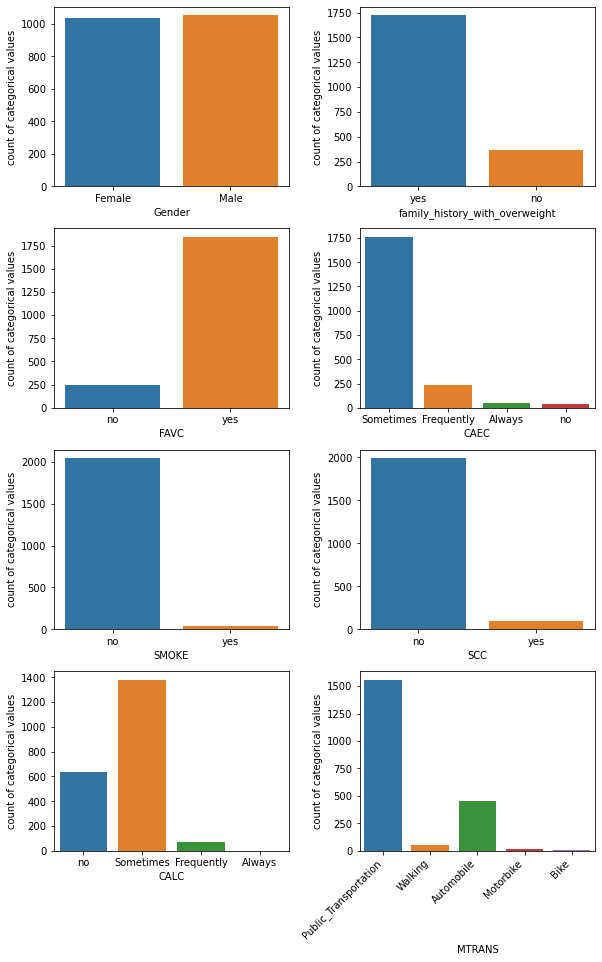

In [11]:
# A preliminary EDA for categorical features only

# Create subplots
fig, ax = plt.subplots(4, 2, figsize=(9, 14))

# Loop through categorical columns excluding 'NObeyesdad'
for col, subplot in zip(cat_cols[:-1], ax.flatten()):  # Exclude last element with cat_cols[:-1]
    sns.countplot(obesity[col], ax=subplot)
    
    if col == "MTRANS":
        # Rotate x-axis tick labels for 'MTRANS'
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    # Set y-axis label
    subplot.set_ylabel("count of categorical values")

# Adjust layout to prevent overlap
plt.tight_layout(pad=3, w_pad=1, h_pad=1)

# Save the plots
plt.savefig("Obesity_categorical_counts.png")

In [12]:
# Label Encode the features with categorical values
for col in cat_cols:
    le = LabelEncoder()
    obesity[col] = le.fit_transform(obesity[col])
    print(f'{col} == {le.classes_}')

Gender == ['Female' 'Male']
family_history_with_overweight == ['no' 'yes']
FAVC == ['no' 'yes']
CAEC == ['Always' 'Frequently' 'Sometimes' 'no']
SMOKE == ['no' 'yes']
SCC == ['no' 'yes']
CALC == ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS == ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
NObeyesdad == ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


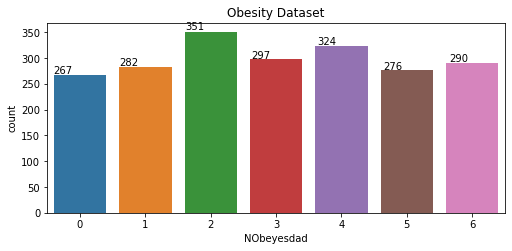

In [13]:
# Analyze the distribution of target classes in Obesity dataset

plt.figure(figsize=(8.2, 3.5))
ax=sns.countplot('NObeyesdad',data=obesity)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    
ax.set_title('Obesity Dataset')
plt.savefig("Obesity_target_counts.png")

In [14]:
# Step 1: Split original df into training and test sets

train_obesity, test_obesity = train_test_split(obesity, test_size=0.2, random_state=42)

In [15]:
# Step 2: Define the X and Y
y_train = train_obesity.NObeyesdad
X_train = train_obesity.drop(['NObeyesdad'], axis=1)

y_test = test_obesity.NObeyesdad
X_test = test_obesity.drop(['NObeyesdad'], axis=1)

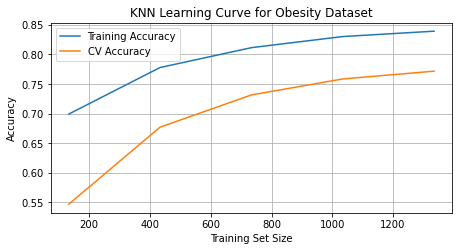

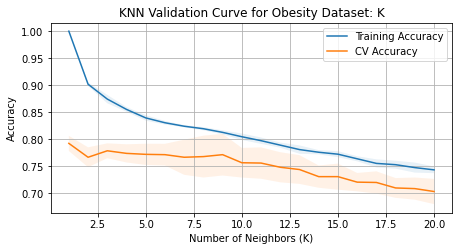

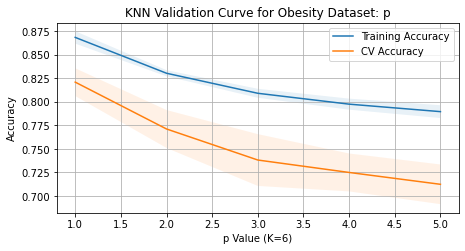

In [16]:
# Step 3: KNN algorithm

# Initialize and fit StandardScaler on the training dataset for KNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define knn model

knn = KNeighborsClassifier(n_neighbors=5)

# Generate learning curve data
        
train_sizes, train_scores, val_scores = learning_curve(knn, X_train_scaled, y_train, cv=5, random_state=42, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(7.2, 3.5))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='CV Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('KNN Learning Curve for Obesity Dataset')
plt.legend()
plt.grid(True)


plt.savefig('KNN_Learning_Curve_Obesity.png')

# Write the plot values to a file to determine optimum training size
with open(output_file, 'a') as f:
    f.write('#####   KNN implementation on Obesity Dataset  #####\n\n')
    f.write('These are the plot values from KNN Learning Curve:\n')
    f.write(f'Training sizes: {train_sizes}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')
    
# KNN hyperparameter analysis

## K value (n_neighbors) ##

k_values = np.arange(1, 21)

# Generate the validation curve for k-NN
train_scores, val_scores = validation_curve(knn, X_train_scaled, y_train, param_name="n_neighbors", 
                                            param_range=k_values, cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves for K hyperparameter
plt.figure(figsize=(7.2, 3.5))
plt.plot(k_values, train_mean, label='Training Accuracy')
plt.plot(k_values, val_mean, label='CV Accuracy')
plt.fill_between(k_values, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(k_values, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('KNN Validation Curve for Obesity Dataset: K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid(True)

# Save the validation curve
plt.savefig('KNN_Validation_Curve_K_Obesity.png')

# Write the plot values to a file to determine optimum K

# Rule 1: Check for minimum variation between training and CV accuracy to avoid overfitting
# Rule 2: Select the K which has highest training and CV accuracy

with open(output_file, 'a') as f:
    f.write('These are the plot values of KNN Validation Curve for K:\n')
    f.write(f'K values: {k_values}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')

# Initialize KNN with optimal K as decided from above

knn = KNeighborsClassifier(n_neighbors=6) # n_neighbors=6 is the best as per above

## p value (distance metric) ##

p_values = np.arange(1, 6)

# Generate the validation curve for k-NN
train_scores, val_scores = validation_curve(knn, X_train_scaled, y_train, param_name="p", 
                                            param_range=p_values, cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves for p hyperparameter
plt.figure(figsize=(7.2, 3.5))
plt.plot(p_values, train_mean, label='Training Accuracy')
plt.plot(p_values, val_mean, label='CV Accuracy')
plt.fill_between(p_values, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(p_values, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('KNN Validation Curve for Obesity Dataset: p')
plt.xlabel('p Value (K=6)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid(True)

# Save the KNN validation plot for varying p
plt.savefig('KNN_Validation_Curve_p_Obesity.png')

# Write the plot values to the file to determine optimum p

# Rule 1: Check for minimum variation between training and CV accuracy to avoid overfitting
# Rule 2: Select the p which has highest training and CV accuracy

with open(output_file, 'a') as f:
    f.write('These are the plot values of KNN Validation Curve for p:\n')
    f.write(f'p values: {p_values}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')
    
### Final fitting on test data ###

# set knn model with optimized parameters
knn_final = KNeighborsClassifier(n_neighbors=6, p=1)  # n_neighbors=6 and p=1 are the best

start_time = time.time()
knn_final.fit(X_train_scaled, y_train)
end_time = time.time()

# Predict on training and test data
train_pred = knn_final.predict(X_train_scaled)
test_pred = knn_final.predict(X_test_scaled)

# Calculate accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Calculate wall-clock time
wall_clock_time = end_time-start_time

with open(output_file, 'a') as f:
    f.write('These are the outputs for the KNN model:\n')
    f.write(f'Training accuracy: {train_acc}\n')
    f.write(f'Testing accuracy: {test_acc}\n')
    f.write(f'Wall-clock time: {wall_clock_time:.6f} seconds\n\n')

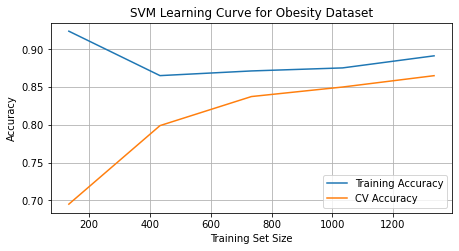

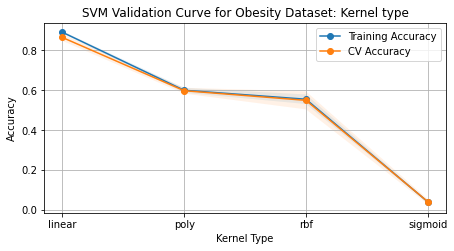

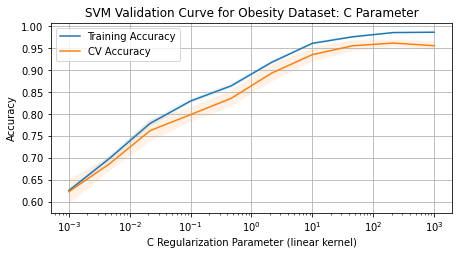

In [17]:
# Step 3: SVM algorithm

# Define svm model

svm = SVC(kernel='linear', random_state=42)

# Generate learning curve data
        
train_sizes, train_scores, val_scores = learning_curve(svm, X_train, y_train, cv=5, random_state=42, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(7.2, 3.5))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='CV Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('SVM Learning Curve for Obesity Dataset')
plt.legend()
plt.grid(True)


plt.savefig('SVM_Learning_Curve_Obesity.png')

# Write the plot values to a file to determine optimum training size
with open(output_file, 'a') as f:
    f.write('#####   SVM implementation on Obesity Dataset #######\n\n')
    f.write('These are the plot values of SVM Learning Curve:\n')
    f.write(f'Training sizes: {train_sizes}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')
    
# SVM hyperparameter analysis

## Kernel type ##

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Generate the validation curve for SVM Kernel type
train_scores, val_scores = validation_curve(svm, X_train, y_train, param_name="kernel", param_range=kernels, 
                                            cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves for Kernel type hyperparameter
plt.figure(figsize=(7.2, 3.5))
plt.plot(kernels, train_mean, marker='o', label='Training Accuracy')
plt.plot(kernels, val_mean, marker='o', label='CV Accuracy')
plt.fill_between(kernels, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(kernels, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('SVM Validation Curve for Obesity Dataset: Kernel type')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid(True)

# Save the validation curve
plt.savefig('SVM_Validation_Curve_Kernel_Obesity.png')

# Write the plot values to a file to determine optimum kernel type

# Rule 1: Check for minimum variation between training and CV accuracy to avoid overfitting
# Rule 2: Select the kernel which has highest training and CV accuracy

with open(output_file, 'a') as f:
    f.write('These are the plot values of SVM Validation Curve for Kernel types:\n')
    f.write(f'Kernel types: {kernels}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')

# Initialize SVM with optimal kernel type as decided from above

svm = SVC(kernel='linear', random_state=42)  # linear is the best as per above

## C value (Regularization parameter) ##

C_range = np.logspace(-3, 3, 10)

# Generate the validation curve for SVM C parameter
train_scores, val_scores = validation_curve(svm, X_train, y_train, param_name="C", param_range=C_range, 
                                            cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves for C hyperparameter
plt.figure(figsize=(7.2, 3.5))
plt.plot(C_range, train_mean, label='Training Accuracy')
plt.plot(C_range, val_mean, label='CV Accuracy')
plt.fill_between(C_range, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(C_range, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('SVM Validation Curve for Obesity Dataset: C Parameter')
plt.xlabel('C Regularization Parameter (linear kernel)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(loc="best")
plt.grid(True)

# Save the SVM validation plot for varying C
plt.savefig('SVM_Validation_Curve_C_Obesity.png')

# Write the plot values to the file to determine optimum C

# Rule 1: Check for minimum variation between training and CV accuracy
# Rule 2: Select the C which has highest training and CV accuracy

with open(output_file, 'a') as f:
    f.write('These are the plot values of SVM Validation Curve for C:\n')
    f.write(f'C values: {C_range}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')
    
### Final fitting on test data ###

# set svm model with optimized parameters
svm_final = SVC(kernel='linear', C=100, random_state=42)  # linear kernel and C=100 are optimal

start_time = time.time()
svm_final.fit(X_train,y_train)
end_time = time.time()

# Predict on training and validation data
train_pred = svm_final.predict(X_train)
test_pred = svm_final.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Calculate wall-clock time
wall_clock_time = end_time-start_time

# Output the final results for SVM model

with open(output_file, 'a') as f:
    f.write('These are the outputs for the SVM model:\n')
    f.write(f'Training accuracy: {train_acc}\n')
    f.write(f'Testing accuracy: {test_acc}\n')
    f.write(f'Wall-clock time: {wall_clock_time:.6f} seconds\n\n')

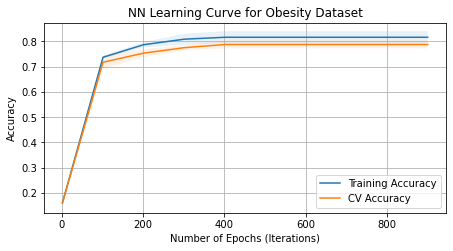

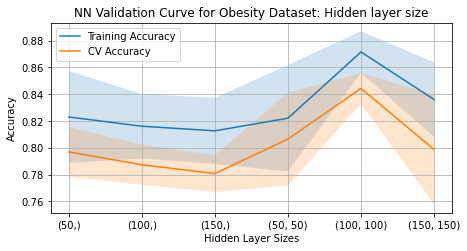

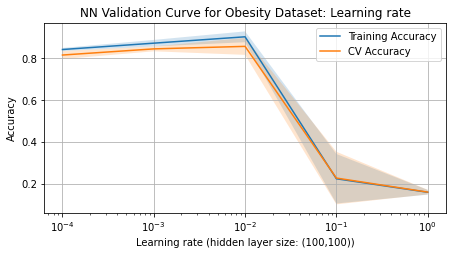

In [18]:
# Step 3: NN algorithm

# Define a NN classifier with simple architecture
mlp = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=1000, 
                    warm_start=True, random_state=42)

# Define the range of epochs (number of iterations)
param_range = np.arange(1, 1000, 100)

# Generate the learning curve using cross-validation
# The function is validation_curve as epochs are tested instead of training size
train_scores, val_scores = validation_curve(mlp, X_train, y_train, param_name="max_iter", param_range=param_range, 
                                            cv=5, scoring="accuracy", n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve with epochs as the x-axis
plt.figure(figsize=(7.2, 3.5))
plt.plot(param_range, train_mean, label="Training Accuracy")
plt.plot(param_range, val_mean, label="CV Accuracy")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.title("NN Learning Curve for Obesity Dataset")
plt.xlabel("Number of Epochs (Iterations)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# Save the learning curve
plt.savefig('NN_Learning_Curve_Obesity.png')

# Write the plot values to a file to determine optimum epochs
with open(output_file, 'a') as f:
    f.write('#####   NN implementation on Obesity Dataset #######\n\n')
    f.write('These are the plot values of NN Learning Curve:\n')
    f.write(f'Number of Iterations: {param_range}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')
    
# NN hyperparameter analysis

## Hidden layer size ##

param_range = [(50,), (100,), (150,), (50, 50), (100, 100), (150, 150)]

# Generate the validation curve for NN
train_scores, val_scores = validation_curve(mlp, X_train, y_train, param_name="hidden_layer_sizes", param_range=param_range, 
                                            cv=5, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves for hidden layer size hyperparameter
plt.figure(figsize=(7.2, 3.5))
plt.plot([str(layer) for layer in param_range], train_mean, label="Training Accuracy")
plt.plot([str(layer) for layer in param_range], val_mean, label="CV Accuracy")

plt.fill_between([str(layer) for layer in param_range], train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between([str(layer) for layer in param_range], val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.title("NN Validation Curve for Obesity Dataset: Hidden layer size")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# Save the validation curve
plt.savefig('NN_Validation_Curve_HiddenLayerSize_Obesity.png')

# Write the plot values to a file to determine optimum hidden layer size

# Rule 1: Check for minimum variation between training and CV accuracy to avoid overfitting
# Rule 2: Select the hidden layer which has highest training and CV accuracy with low depth/width

with open(output_file, 'a') as f:
    f.write('These are the plot values of NN Validation Curve for Hidden Layer Sizes:\n')
    f.write(f'Hidden layer size: {param_range}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')

# Initialize NN with optimal hidden layer size as decided from above

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=1000, 
                    warm_start=True, random_state=42) # hidden_layer_sizes=(100,) is the best as per above

## Learning rate ##

param_range = [0.0001, 0.001, 0.01, 0.1, 1]

# Generate the validation curve for learning rate
train_scores, val_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=param_range, 
                                            cv=5, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curves for learning rate hyperparameter
plt.figure(figsize=(7.2, 3.5))
plt.plot(param_range, train_mean, label="Training Accuracy")
plt.plot(param_range, val_mean, label="CV Accuracy")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xscale('log')
plt.title("NN Validation Curve for Obesity Dataset: Learning rate")
plt.xlabel("Learning rate (hidden layer size: (100,100))")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# Save the NN validation plot for varying learning rate
plt.savefig('NN_Validation_Curve_Learning_rate_Obesity.png')

# Write the plot values to the file to determine optimum learning rate

# Rule 1: Check for minimum variation between training and CV accuracy
# Rule 2: Select the learning rate which has highest training and CV accuracy

with open(output_file, 'a') as f:
    f.write('These are the plot values of NN Validation Curve for learning rate:\n')
    f.write(f'learning rate values: {param_range}\n')
    f.write(f'Training accuracy mean: {train_mean}\n')
    f.write(f'CV accuracy mean: {val_mean}\n\n')
    
### Final fitting on test data ###

# set NN model with optimized parameters
mlp_final = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.01, max_iter=1000, warm_start=True, 
                          random_state=42) # hidden_layer_size=(100,) and learning_rate_init=0.003 are optimum from above

start_time = time.time()
mlp_final.fit(X_train,y_train)
end_time = time.time()

# Predict on training and validation data
train_pred = mlp_final.predict(X_train)
test_pred = mlp_final.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Calculate wall-clock time
wall_clock_time = end_time-start_time

# Output the final results for NN model

with open(output_file, 'a') as f:
    f.write('These are the outputs for the NN model:\n')
    f.write(f'Training accuracy: {train_acc}\n')
    f.write(f'Testing accuracy: {test_acc}\n')
    f.write(f'Wall-clock time: {wall_clock_time:.6f} seconds\n\n')